<a href="https://colab.research.google.com/github/LammyG/HDSC-Neural-network-Obj-det-Image-Rec/blob/main/Neural_network%2C_obj_detectn_%26_image_recognitn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==1.15

In [ ]:
#Neural network, Image recognition & Object detection
#introduction to keras and tensorFlow with python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Training data: {}, {}".format(train_images.shape, train_labels.shape))
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))

Training data: (60000, 28, 28), (60000,)
Test data: (10000, 28, 28), (10000,)
There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


<function matplotlib.pyplot.show>

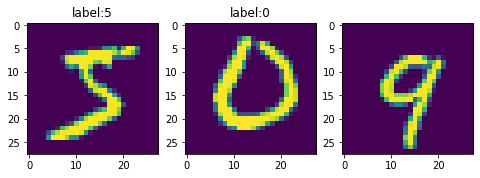

In [ ]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 3,1 )
plt.imshow(train_images[0])
plt.title("label:{}".format(train_labels[0]))

plt.subplot(1, 3, 2)
plt.imshow(train_images[2500])
plt.title("label:{}".format(train_labels[2500]))

plt.subplot(1, 3, 3)
plt.imshow(test_images[12])

plt.show


In [ ]:
#as usual we scale our dataset to range between 0 and 1. in this dataset, the pixel values range from 0 to 255.
#dividing the data by 255 scales to the required range
train_images = train_images / 255.0
test_images = test_images / 255.0



In [ ]:
#split trainng data to training and validation sets
x_train = train_images[0:50000]
x_val = train_images[50000: ]
y_train = train_labels[0:50000]
y_val = train_labels[50000: ]

print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("y_train: {}".format(y_train.shape))
print("y_val: {}".format(y_val.shape))


x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [ ]:
#reshape data from 28*28 array to a single array
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)

print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("test_images: {}".format(test_images))

x_train: (50000, 784)
x_val: (10000, 784)
test_images: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#encode labels to categorical variables
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)


In [ ]:
#split trainng data to training and validation sets
x_train = train_images[0:50000]
x_val = train_images[50000: ]
y_train = train_labels[0:50000]
y_val = train_labels[50000: ]

print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("y_train: {}".format(y_train.shape))
print("y_val: {}".format(y_val.shape))


x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [ ]:
#inputs
#placeholders are not enabled in tf2
X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])
#create model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
  # first layer
  first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
  first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))

  #second layer
  second_weight = tf.Variable(tf.random_uniform([first_layer_neurons, second_layer_neurons]))
  second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
  second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), second_bias))
  #output layer
  final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
  final_bias = tf.Variable(tf.zeros([no_classes]))
  logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

  return logits
  logits = multilayer_perceptron(X, no_labels)
learning_rate = 0.01
#we define the loss and optimiser of the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)



In [ ]:
#train model
with tf.Session() as session:
  session.run(init)
  for epoch in range(epoch):
    average_cost = 0
    start, end = 0, batch_size

    for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_train[start: end]
      _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
      start += batch_size
      end += batch_size
      #average loss
      average_cost += loss/iteration

    print("epoch========{}".format(epoch))
    
    #evaluate model
    prediction = tf.nn.softmax(logits)
    ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))

    print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))

In [ ]:
#Optimization for training deep neural network

#building a  sequential feed forward network in keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
#build the model object
model = Sequential()
#build the input and hidden layer
model.add(Dense(256, activation='relu', input_shape=(new_dimension, )))
model.add(Dense(128, activation='relu'))
#build the output layer
model.add(Dense(no_labels, activation='softmax'))
#configuring the training and learning process
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)
test_loss, test_accuracy = model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 54us/sample - loss: 0.6636 - acc: 0.8246 - val_loss: 0.2597 - val_acc: 0.9241
Epoch 2/20
50000/50000 [==============================] - 3s 62us/sample - loss: 0.2319 - acc: 0.9333 - val_loss: 0.1817 - val_acc: 0.9498
Epoch 3/20
50000/50000 [==============================] - 3s 67us/sample - loss: 0.1684 - acc: 0.9512 - val_loss: 0.1449 - val_acc: 0.9597
Epoch 4/20
50000/50000 [==============================] - 3s 63us/sample - loss: 0.1326 - acc: 0.9615 - val_loss: 0.1219 - val_acc: 0.9671
Epoch 5/20
50000/50000 [==============================] - 2s 41us/sample - loss: 0.1040 - acc: 0.9703 - val_loss: 0.1119 - val_acc: 0.9684
Epoch 6/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.0856 - acc: 0.9755 - val_loss: 0.1000 - val_acc: 0.9710
Epoch 7/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.0716 - acc: 0.9799 - val_loss: 0.

Text(0.5, 1.0, 'Loss Curves - before regularisation')

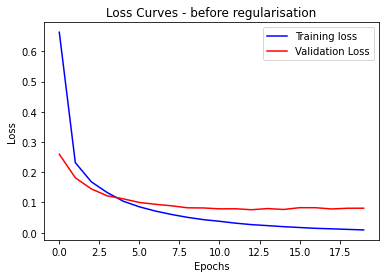

In [ ]:
#check for Overfitting
plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before regularisation')

In [ ]:
#Although the validation and training loss seems great, we can see that the validation class increases. 
#this identifies overfitting in our network. how do we proceed? we introduce regularisation to the model
from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension, )))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation='softmax'))

reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)
test_loss, test_accuracy = model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))



Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 49us/sample - loss: 0.9984 - acc: 0.6849 - val_loss: 0.2970 - val_acc: 0.9143
Epoch 2/20
50000/50000 [==============================] - 2s 39us/sample - loss: 0.3773 - acc: 0.8887 - val_loss: 0.2007 - val_acc: 0.9410
Epoch 3/20
50000/50000 [==============================] - 2s 38us/sample - loss: 0.2835 - acc: 0.9183 - val_loss: 0.1636 - val_acc: 0.9533
Epoch 4/20
50000/50000 [==============================] - 2s 38us/sample - loss: 0.2338 - acc: 0.9325 - val_loss: 0.1372 - val_acc: 0.9614
Epoch 5/20
50000/50000 [==============================] - 2s 39us/sample - loss: 0.2013 - acc: 0.9420 - val_loss: 0.1230 - val_acc: 0.9651
Epoch 6/20
50000/50000 [==============================] - 2s 39us/sample - loss: 0.1773 - acc: 0.9478 - val_loss: 0.1112 - val_acc: 0.9681
Epoch 7/20
50000/50000 [==============================] - 2s 39us/sample - loss: 0.1623 - acc: 0.9523 - val_loss: 0.

Text(0.5, 1.0, 'Loss Curves - after regularisation')

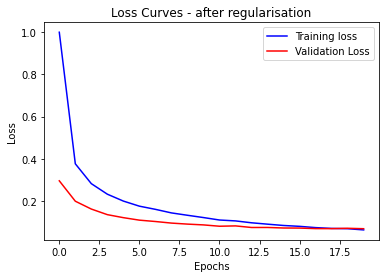

In [ ]:
#check for Overfitting
plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after regularisation')

In [ ]:
#making prediction
#using our model to predict some images and labels
prediction = model.predict([test_images])
print(np.argmax(prediction[1000]))

9


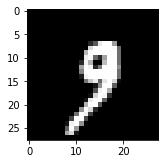

In [ ]:
#let see whether the image would turn out to be 9
plt.figure(figsize=(8, 5))
plt.subplot(1,3,1)
#import the image
plt.imshow(test_images[1000].reshape(28,28), cmap="gray")
#show the image
plt.show()

In [ ]:
#trying out others
prediction = model.predict([test_images])
print(np.argmax(prediction[6500]))

5


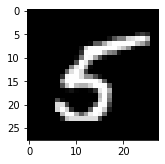

In [ ]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 3, 1)
plt.imshow(test_images[6500].reshape(28, 28), cmap="gray")
plt.show()

In [ ]:
prediction = model.predict([test_images])
print(np.argmax(prediction[3400]))

7


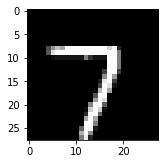

In [ ]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 3, 1)
plt.imshow(test_images[3400].reshape(28, 28), cmap="gray")
plt.show()